# Tugas 2 Kelompok (Kelompok 10)
anggota:
- Muhammad Habil Aswad (2208107010013)
- Rafli Afriza Nugraha (2208107010028)
- Muhammad Khalid Al Ghifati (2208107010044)
- Muhammad Ridho (2208107010064)
- Muhammad Ilzam (2208107010087)

## Memuat dataset

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 1. Pemahaman Dataset

Nama dataset yang digunakan: **CO2 Emission by Vehicles**  
Sumber dataset: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

### Deskripsi Dataset (`CO2 Emissions_Canada.csv`)  
Dataset ini adalah data detail tentang bagaimana emisi CO2 oleh kendaraan dapat dihasilkan bervariasi berdasarkan berbagai fiturnya. Kumpulan data ini diambil dari situs web data terbuka resmi Pemerintah Kanada. Ini adalah versi yang dikompilasi. Berisi data selama periode 7 tahun.
Total ada 7385 baris dan 12 kolom.

### Memuat dataset

In [122]:
# Memuat dataset dari file CSV
df = pd.read_csv("CO2 Emissions_Canada.csv")

### Menampilkan Statistik dasar dataset

In [123]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [124]:
# Contoh data pada dataset
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [125]:
# Ringkasan statistik dasar
print("Ringkasan Statistik Dataset:")
print(df.describe())

Ringkasan Statistik Dataset:
       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min               

In [126]:
# Menampilkan jumlah missing values di setiap kolom
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

Jumlah Missing Values per Kolom:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


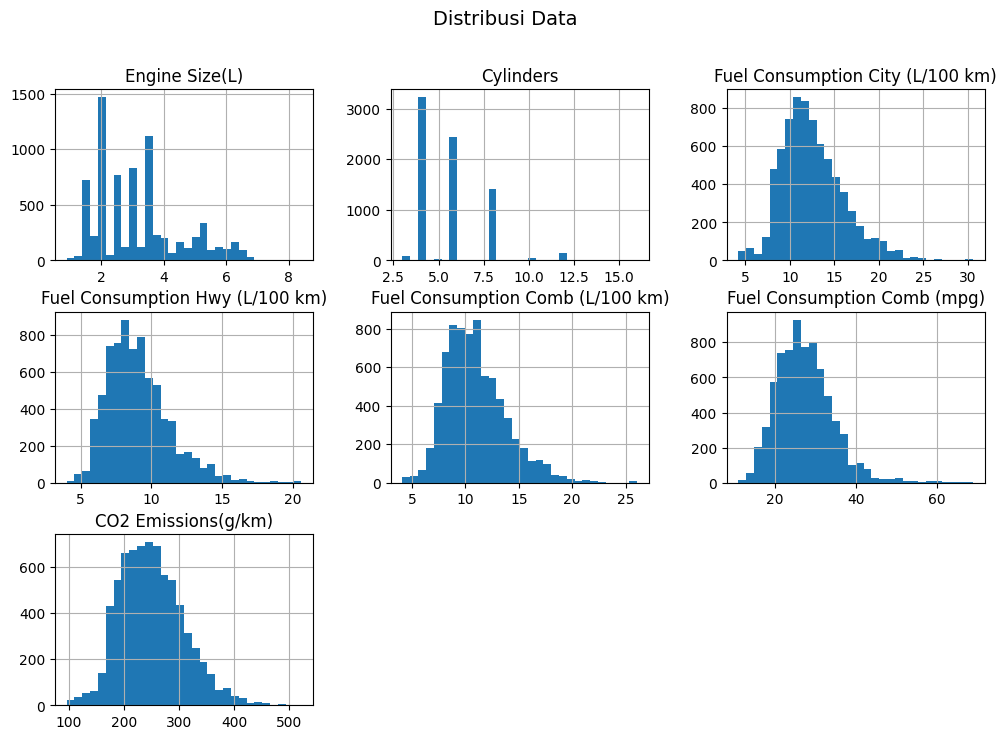

In [127]:
# Menampilkan distribusi data untuk setiap fitur numerik
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribusi Data", fontsize=14)
plt.show()

## 2. Eksplorasi Data dan Pra-pemrosesan
Dikarenakan tidak ada missing value, hanya akan dilakukan analisis Korelasi antara variabel independen dan dependen, ploting distribusi data, dan label encoding untuk kolom kategorikal Fuel Type.

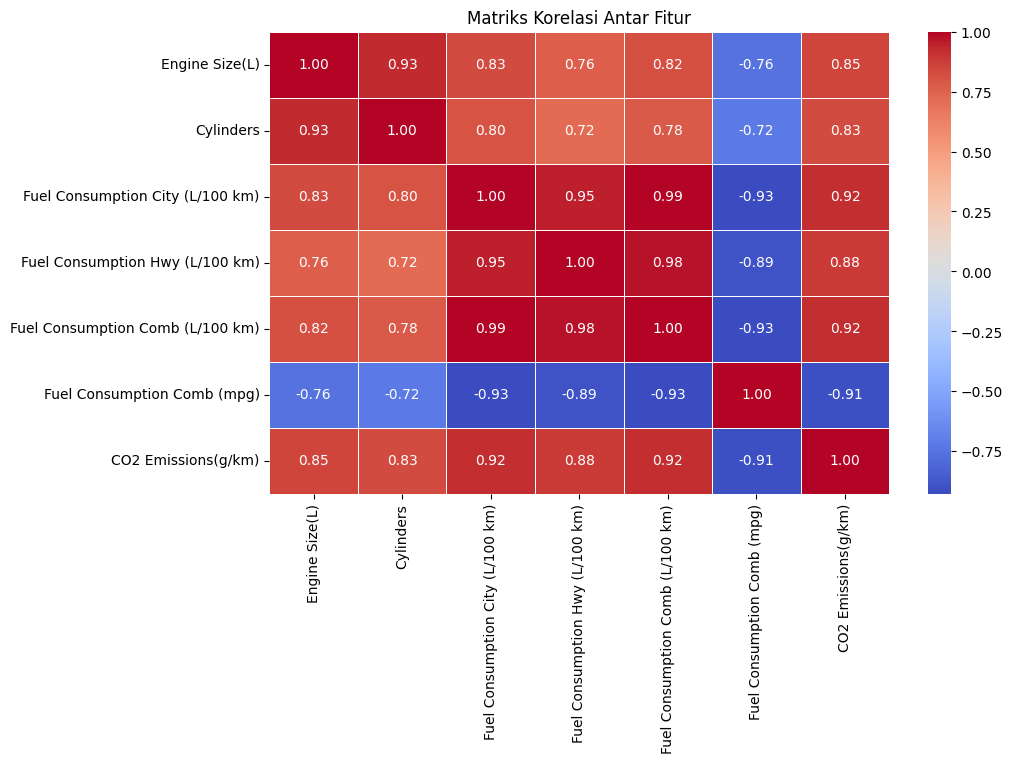

In [128]:
# Menampilkan korelasi antar fitur numerik dalam bentuk heatmap
plt.figure(figsize=(10, 6))

# Memilih hanya kolom numerik sebelum menghitung korelasi
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Matriks Korelasi Antar Fitur")
plt.show()

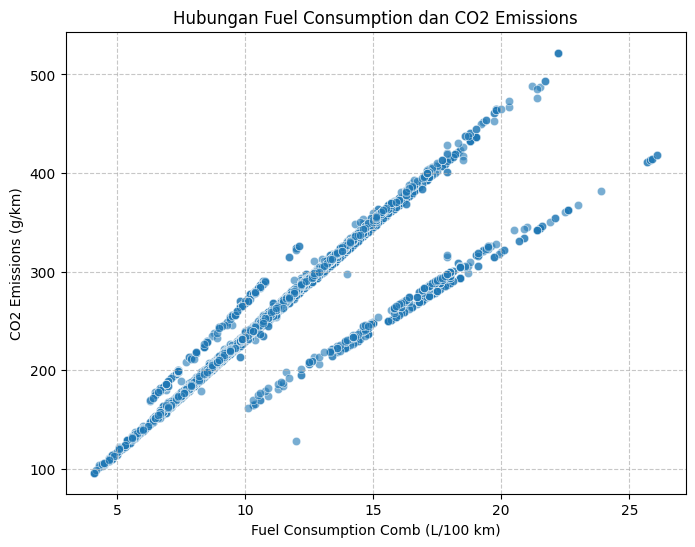

In [129]:
# Lihat Distribusi Plotnya dengan Fuel Consumption Combination (karena korelasi tertinggi)
# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Fuel Consumption Comb (L/100 km)"], y=df["CO2 Emissions(g/km)"], alpha=0.6)

# Judul dan label
plt.title("Hubungan Fuel Consumption dan CO2 Emissions")
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.grid(True, linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

In [130]:
# Label Encoding untuk Fuel Type yang masih kategorikal
le = LabelEncoder()
df["Fuel Type"] = le.fit_transform(df["Fuel Type"])

## 3. Implementasi model
Kolom Jenis bahan bakar, konsumsi bahan bakar, kapasitas mesin akan dijasikan variable X (Independen variable), dan Emisi CO2 akan menjadi y (dependen variable). Dilakukan pembagian data 80% Training dan 20% Testing.

In [131]:
# Pilih fitur (X) dan target (y)
X = df[["Fuel Type", "Fuel Consumption Comb (L/100 km)", "Engine Size(L)"]]
y = df["CO2 Emissions(g/km)"]

# Split dataset 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Membuat model regresi linear

In [132]:
# Inisialisasi model
linear_model = LinearRegression()

# Training model
linear_model.fit(X_train, y_train)

LinearRegression()

### Membuat model regresi polinomial

In [133]:
# Transformasi fitur menjadi polinomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Inisialisasi model
poly_model = LinearRegression()

# Training model
poly_model.fit(X_train_poly, y_train)

LinearRegression()

## 4. Evaluasi Model

### Evaluasi Model Regresi Linear

In [134]:
# Prediksi
y_pred_linear = linear_model.predict(X_test)

# Evaluasi Regresi Linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mape_linear = np.mean(np.abs((y_test - y_pred_linear) / y_test)) * 100

print("Evaluasi Regresi Linear:")
print(f"MSE  : {mse_linear:.4f}")
print(f"R2   : {r2_linear:.4f}")
print(f"MAE  : {mae_linear:.4f}")
print(f"MAPE : {mape_linear:.2f}%")

Evaluasi Regresi Linear:
MSE  : 377.2062
R2   : 0.8903
MAE  : 12.9623
MAPE : 5.36%


### Evaluasi Model Regresi Polinomial

In [135]:
# Prediksi
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluasi Regresi Polinomial
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mape_poly = np.mean(np.abs((y_test - y_pred_poly) / y_test)) * 100

print("Evaluasi Regresi Polinomial:")
print(f"MSE  : {mse_poly:.4f}")
print(f"R2   : {r2_poly:.4f}")
print(f"MAE  : {mae_poly:.4f}")
print(f"MAPE : {mape_poly:.2f}%")

Evaluasi Regresi Polinomial:
MSE  : 91.8307
R2   : 0.9733
MAE  : 5.6609
MAPE : 2.33%


## Perbandingan Evaluasi model linear dan polinomial

In [136]:
# Buat DataFrame
eval_df = pd.DataFrame({
    "Metric": ["MSE", "R2", "MAE", "MAPE (%)"],
    "Regresi Linear": [mse_linear, r2_linear, mae_linear, f"{mape_linear:.4f}%"],  
    "Regresi Polinomial": [mse_poly, r2_poly, mae_poly, f"{mape_poly:.4f}%"]      
})

# Atur format tampilan desimal (kecuali MAPE sudah berbentuk string)
eval_df.iloc[:3, 1:3] = eval_df.iloc[:3, 1:3].applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else x)

# Tampilkan tabel
print(eval_df)

     Metric Regresi Linear Regresi Polinomial
0       MSE       377.2062            91.8307
1        R2         0.8903             0.9733
2       MAE        12.9623             5.6609
3  MAPE (%)        5.3619%            2.3281%


C:\Users\habil\AppData\Local\Temp\ipykernel_17844\2738904813.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  eval_df.iloc[:3, 1:3] = eval_df.iloc[:3, 1:3].applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else x)


## 4. Analisis Hasil

### Koefisien Regresi

In [137]:
# Tampilkan koefisien regresi linear
coef_df = pd.DataFrame({
    "Fitur": X_train.columns,
    "Koefisien": linear_model.coef_
})

# Tambahkan intercept
intercept = pd.DataFrame({"Fitur": ["Intercept"], "Koefisien": [linear_model.intercept_]})

# Gabungkan
coef_df = pd.concat([intercept, coef_df], ignore_index=True)

# Tampilkan
print(coef_df)

                              Fitur  Koefisien
0                         Intercept  18.932011
1                         Fuel Type  10.737114
2  Fuel Consumption Comb (L/100 km)  14.999313
3                    Engine Size(L)  10.140795


In [138]:
# Tampilkan koefisien regresi polinomial
coef_poly_df = pd.DataFrame({
    "Fitur": poly.get_feature_names_out(X_train.columns),
    "Koefisien": poly_model.coef_
})

# Tambahkan intercept
intercept_poly = pd.DataFrame({"Fitur": ["Intercept"], "Koefisien": [poly_model.intercept_]})

# Gabungkan
coef_poly_df = pd.concat([intercept_poly, coef_poly_df], ignore_index=True)

# Tampilkan
print(coef_poly_df)

                                              Fitur   Koefisien
0                                         Intercept  144.431428
1                                                 1    0.000000
2                                         Fuel Type  -44.457472
3                  Fuel Consumption Comb (L/100 km)   -0.034179
4                                    Engine Size(L)   35.260627
5                                       Fuel Type^2   -0.608633
6        Fuel Type Fuel Consumption Comb (L/100 km)    7.244580
7                          Fuel Type Engine Size(L)   -8.734772
8                Fuel Consumption Comb (L/100 km)^2    0.043506
9   Fuel Consumption Comb (L/100 km) Engine Size(L)   -1.001662
10                                 Engine Size(L)^2    1.057230


## Grafik Regresi

In [139]:
# Menyamakan dimensi
X_range = np.linspace(X_test["Fuel Consumption Comb (L/100 km)"].min(), 
                       X_test["Fuel Consumption Comb (L/100 km)"].max(), 100).reshape(-1, 1)

# Gunakan nilai rata-rata untuk fitur lain
X_other_avg = np.array([[df["Fuel Type"].mean(), df["Engine Size(L)"].mean()]] * 100)

# Gabungkan kembali fitur untuk prediksi
X_range_full = np.hstack((X_other_avg, X_range))

# Prediksi garis regresi linear
y_range_linear = linear_model.predict(X_range_full)

C:\Users\habil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Plot Regresi Linear

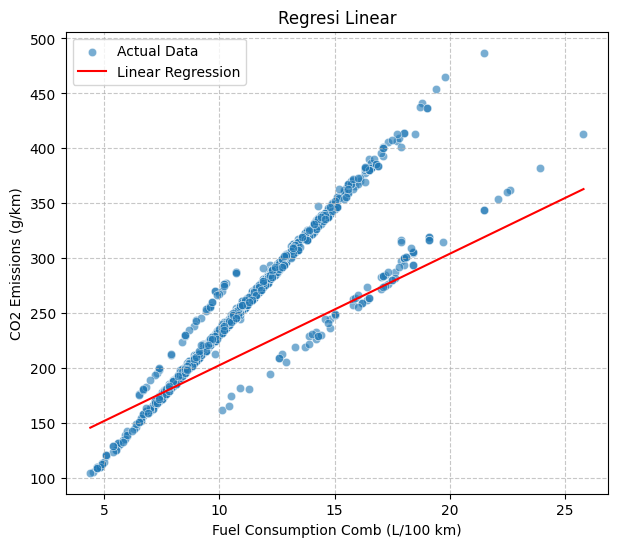

In [140]:
# Plot Regresi Linear
plt.figure(figsize=(7,6))
sns.scatterplot(x=X_test["Fuel Consumption Comb (L/100 km)"], y=y_test, alpha=0.6, label="Actual Data")
plt.plot(X_range.flatten(), y_range_linear, color='red', label="Linear Regression") 

plt.title("Regresi Linear")
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### Plot Regresi polinomial

C:\Users\habil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


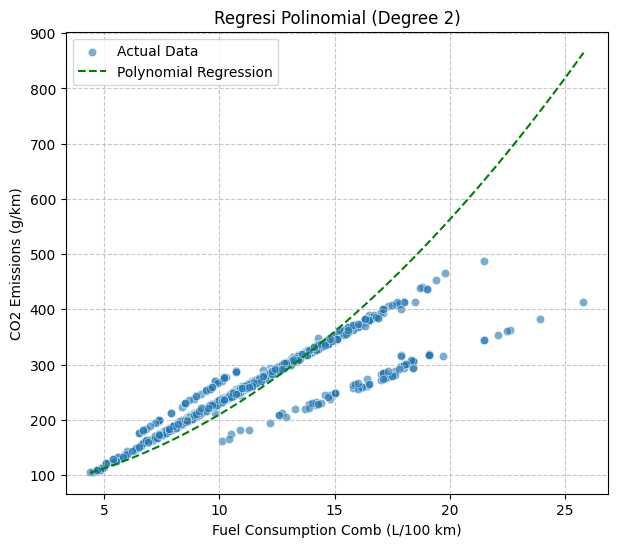

In [141]:
# Transformasi polinomial untuk X_range
X_range_poly = poly.transform(X_range_full)
y_range_poly = poly_model.predict(X_range_poly)

# Plot Regresi Polinomial
plt.figure(figsize=(7,6))
sns.scatterplot(x=X_test["Fuel Consumption Comb (L/100 km)"], y=y_test, alpha=0.6, label="Actual Data")
plt.plot(X_range.flatten(), y_range_poly, color='green', linestyle='dashed', label="Polynomial Regression")

plt.title("Regresi Polinomial (Degree 2)")
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

## Hasil Analisis
Dari analisis tersebut, dapat dilihat bahwa model regresi polinomial lebih tepat digunakan karena menunjukkan evluasi yang lebih baik dibandingkan regresi linear dengan MSE 91.8307, R2 0.9733, MAE 5.6609, dan MAPE 2.33%. Dapat juga dilihat pada Grafik plot model, bahwa model Regresi polinomial lebih banyak mendekati ke titik distribusi data, walaupun tetap terdapat titik yang berada jauh di bawah garis. Hal ini mungkin disebabkan oleh fitur independen lain seperti jenis kendaraan maupun dimana silinder yang mempengaruhi cepatnya proses pembakaran bahan bakar hingga lebih sedikit mengeluarkan emisi CO2. Namun dengan pendekatan regresi polinomial, sudah cukup memberikan gambaran mengenai bagaiamana peningkatan gas carbon dioksida berdasarkan ukuran mesin, jenis bensin, dan penggunaan bahan bakarnya.